In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import neighbors
from sklearn.linear_model import RidgeClassifier
from sklearn import svm
import random

# Data

In [2]:
df = pd.read_csv('/content/heart.csv')

In [3]:
# Visualizar as primeiras linhas
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Processing


In [4]:
# DataShape
df.shape

(918, 12)

In [5]:
# Informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df = pd.get_dummies(df)

In [7]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


#### Será preciso transformar os tipos Object para Float ou Int

In [8]:
# Conferindo se a operação acima funcionou corretamente
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_F              918 non-null    uint8  
 8   Sex_M              918 non-null    uint8  
 9   ChestPainType_ASY  918 non-null    uint8  
 10  ChestPainType_ATA  918 non-null    uint8  
 11  ChestPainType_NAP  918 non-null    uint8  
 12  ChestPainType_TA   918 non-null    uint8  
 13  RestingECG_LVH     918 non-null    uint8  
 14  RestingECG_Normal  918 non-null    uint8  
 15  RestingECG_ST      918 non-null    uint8  
 16  ExerciseAngina_N   918 non

Normalizando


In [9]:
normalized_df=(df-df.min())/(df.max()-df.min())
df = normalized_df

In [10]:
# Conferindo o novo dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    float64
 1   RestingBP          918 non-null    float64
 2   Cholesterol        918 non-null    float64
 3   FastingBS          918 non-null    float64
 4   MaxHR              918 non-null    float64
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    float64
 7   Sex_F              918 non-null    float64
 8   Sex_M              918 non-null    float64
 9   ChestPainType_ASY  918 non-null    float64
 10  ChestPainType_ATA  918 non-null    float64
 11  ChestPainType_NAP  918 non-null    float64
 12  ChestPainType_TA   918 non-null    float64
 13  RestingECG_LVH     918 non-null    float64
 14  RestingECG_Normal  918 non-null    float64
 15  RestingECG_ST      918 non-null    float64
 16  ExerciseAngina_N   918 non

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.70,0.479270,0.0,0.788732,0.295455,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,0.80,0.298507,0.0,0.676056,0.409091,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,0.65,0.469320,0.0,0.267606,0.295455,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.408163,0.69,0.354892,0.0,0.338028,0.465909,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.530612,0.75,0.323383,0.0,0.436620,0.295455,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [11]:
# Verificando a presença de valores nulos (não assinalados)
df.isnull().sum()

Age                  0
RestingBP            0
Cholesterol          0
FastingBS            0
MaxHR                0
Oldpeak              0
HeartDisease         0
Sex_F                0
Sex_M                0
ChestPainType_ASY    0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
RestingECG_LVH       0
RestingECG_Normal    0
RestingECG_ST        0
ExerciseAngina_N     0
ExerciseAngina_Y     0
ST_Slope_Down        0
ST_Slope_Flat        0
ST_Slope_Up          0
dtype: int64

In [12]:
# Descrição do dataset
# Formatar a exibição
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00,918.00,918.00,918.00,...,918.00,918.00,918.00,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,0.52,0.66,0.33,0.23,0.54,0.40,0.55,0.21,0.79,0.54,...,0.22,0.05,0.20,0.60,0.19,0.60,0.40,0.07,0.50,0.43
std,0.19,0.09,0.18,0.42,0.18,0.12,0.50,0.41,0.41,0.50,...,0.42,0.22,0.40,0.49,0.40,0.49,0.49,0.25,0.50,0.50
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.39,0.60,0.29,0.00,0.42,0.30,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.53,0.65,0.37,0.00,0.55,0.36,1.00,0.00,1.00,1.00,...,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00
75%,0.65,0.70,0.44,0.00,0.68,0.47,1.00,0.00,1.00,1.00,...,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [13]:
# Observando a distribuição do target (Doença ou não)
df['HeartDisease'].value_counts()

1.00    508
0.00    410
Name: HeartDisease, dtype: int64

1 → Doença no Coração

0 → Coração Saudável

Divisão dos dados

In [14]:
target = df['HeartDisease']
features = df.drop(['HeartDisease'], axis=1)

In [15]:
print(target.shape, features.shape)

(918,) (918, 20)


In [16]:
X_train, X_test, Y_train, Y_val = train_test_split(features, target, test_size=0.2, stratify=target, random_state=1)

In [17]:
row_number = len(X_train.index) # Só para obter quantas linhas existem na divisão
print('Shape X_train: ', X_train.shape, 
      '\nShape X_test: ', X_test.shape, 
      '\nShape Y_train: ', Y_train.shape, 
      '\nShape Y_val: ', Y_val.shape)

Shape X_train:  (734, 20) 
Shape X_test:  (184, 20) 
Shape Y_train:  (734,) 
Shape Y_val:  (184,)


In [18]:
# Definindo o modelo
# model = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance') # ---- Acurácia baixa no início e no final
# model = DecisionTreeClassifier(random_state=1) # ---- Acurácia já inicia ligeiramente alta
# model = RidgeClassifier(solver='auto') 
model = svm.SVC(decision_function_shape='ovr', probability = True, verbose = True, max_iter = 4000)
model2 = svm.SVC(decision_function_shape='ovr', probability = True, verbose = True, max_iter = 4000)
# model = svm.LinearSVC(class_weight='balanced')

## Training


##### Treinando de pouco a pouco, tomando aleatoriamente os dados de treino

In [19]:
df_acc = pd.DataFrame()
training_samples = pd.DataFrame()
incremento = 10
cont = 0
max_acc = 0

for i in range(124, row_number+10, incremento):
  acc = 0
  
  X_train_sample = X_train.sample(n=i, random_state=1)
  Y_train_sample = Y_train.sample(n=i, random_state=1)
  training_samples.loc[cont, 'Samples'] = i

  model.fit(X_train_sample, Y_train_sample)
  predict = model.predict(X_test)
  acc = accuracy_score(predict, Y_val)
  df_acc.loc[cont, 'Accuracy'] = acc
  
  cont += 1;
  # Verificando a acurácia
  print('Acurácia do modelo: {:.2f} '.format(acc))
 

[LibSVM]Acurácia do modelo: 0.79 
[LibSVM]Acurácia do modelo: 0.80 
[LibSVM]Acurácia do modelo: 0.80 
[LibSVM]Acurácia do modelo: 0.80 
[LibSVM]Acurácia do modelo: 0.80 
[LibSVM]Acurácia do modelo: 0.80 
[LibSVM]Acurácia do modelo: 0.82 
[LibSVM]Acurácia do modelo: 0.82 
[LibSVM]Acurácia do modelo: 0.83 
[LibSVM]Acurácia do modelo: 0.83 
[LibSVM]Acurácia do modelo: 0.83 
[LibSVM]Acurácia do modelo: 0.83 
[LibSVM]Acurácia do modelo: 0.83 
[LibSVM]Acurácia do modelo: 0.85 
[LibSVM]Acurácia do modelo: 0.85 
[LibSVM]Acurácia do modelo: 0.84 
[LibSVM]Acurácia do modelo: 0.84 
[LibSVM]Acurácia do modelo: 0.84 
[LibSVM]Acurácia do modelo: 0.84 
[LibSVM]Acurácia do modelo: 0.86 
[LibSVM]Acurácia do modelo: 0.85 
[LibSVM]Acurácia do modelo: 0.86 
[LibSVM]Acurácia do modelo: 0.86 
[LibSVM]Acurácia do modelo: 0.86 
[LibSVM]Acurácia do modelo: 0.86 
[LibSVM]Acurácia do modelo: 0.86 
[LibSVM]Acurácia do modelo: 0.86 
[LibSVM]Acurácia do modelo: 0.86 
[LibSVM]Acurácia do modelo: 0.86 
[LibSVM]Acurác

In [20]:
df_acc2 = pd.DataFrame()
training_samples2 = pd.DataFrame()
incremento = 10
cont = 0
max_acc = df_acc.Accuracy.max()
#max_acc = max_acc[:,0]
print(max_acc)
for i in range(124, row_number+10, incremento):
  acc = 0
  if (cont > 0):
    #pego os dados onde o predic estava entre 0.4 e 0.5 indecisão 
    X_train_sample_treated = X_train_sample_treat.copy()
    X_train_sample_treated = X_train_sample_treated.drop(['predict'], axis=1)
    #depois pego o resto para iplementar
    rows = list(X_train_sample_treated.index.values)
    X_train_sample_resto = X_train.copy()
    X_train_sample_resto = X_train_sample_resto.drop(rows)
    X_train_sample_resto = X_train_sample_resto.sample(n=i-count, random_state=0)
    X_train_sample = pd.concat([X_train_sample_treated, X_train_sample_resto]) 
    X_train_sample = X_train_sample.sort_index()

    rows_for_Y = list(X_train_sample.index.values)
    Y_train_sample = Y_train.loc[rows_for_Y]
  
  else:   
    X_train_sample = X_train.sample(n=i, random_state=1)
    Y_train_sample = Y_train.sample(n=i, random_state=1)
  
  training_samples2.loc[cont, 'Samples'] = i

  model2.fit(X_train_sample, Y_train_sample)
  predict = model2.predict(X_test)
  acc = accuracy_score(predict, Y_val)
  df_acc2.loc[cont, 'Accuracy'] = acc

  teste_predict = model2.predict_proba(X_train_sample)
  new_x_train_sample = X_train_sample.copy()
  new_x_train_sample['predict'] = teste_predict[:,0]
  X_train_sample_treat = new_x_train_sample[(new_x_train_sample['predict'] < 0.53) & (new_x_train_sample['predict'] > 0.49)]
  count = len(X_train_sample_treat)
  print(count)


  cont += 1;
  # Verificando a acurácia
  print('Acurácia do modelo: {:.2f} '.format(acc))
  '''
  if (acc >= max_acc):
    print('Atingiu a Acurácia maxima do Passive Learning')
    break
  '''

0.8695652173913043
[LibSVM]1
Acurácia do modelo: 0.79 
[LibSVM]1
Acurácia do modelo: 0.82 
[LibSVM]2
Acurácia do modelo: 0.83 
[LibSVM]0
Acurácia do modelo: 0.84 
[LibSVM]1
Acurácia do modelo: 0.83 
[LibSVM]1
Acurácia do modelo: 0.83 
[LibSVM]1
Acurácia do modelo: 0.83 
[LibSVM]1
Acurácia do modelo: 0.83 
[LibSVM]1
Acurácia do modelo: 0.82 
[LibSVM]1
Acurácia do modelo: 0.85 
[LibSVM]0
Acurácia do modelo: 0.84 
[LibSVM]3
Acurácia do modelo: 0.86 
[LibSVM]1
Acurácia do modelo: 0.83 
[LibSVM]0
Acurácia do modelo: 0.84 
[LibSVM]4
Acurácia do modelo: 0.85 
[LibSVM]0
Acurácia do modelo: 0.84 
[LibSVM]2
Acurácia do modelo: 0.85 
[LibSVM]4
Acurácia do modelo: 0.85 
[LibSVM]0
Acurácia do modelo: 0.84 
[LibSVM]3
Acurácia do modelo: 0.87 
[LibSVM]3
Acurácia do modelo: 0.85 
[LibSVM]0
Acurácia do modelo: 0.84 
[LibSVM]4
Acurácia do modelo: 0.87 
[LibSVM]3
Acurácia do modelo: 0.84 
[LibSVM]4
Acurácia do modelo: 0.85 
[LibSVM]1
Acurácia do modelo: 0.84 
[LibSVM]0
Acurácia do modelo: 0.85 
[LibSVM]2

#### Training Sample x Accuracy
Sem utilizar Active Learning

In [23]:
df_acc.describe()

,Accuracy
count,62.00
mean,0.85
std,0.02
min,0.79
25%,0.84
50%,0.85
75%,0.86
max,0.87


In [24]:
df_acc2.describe()

,Accuracy
count,62.00
mean,0.84
std,0.01
min,0.79
25%,0.84
50%,0.85
75%,0.85
max,0.87


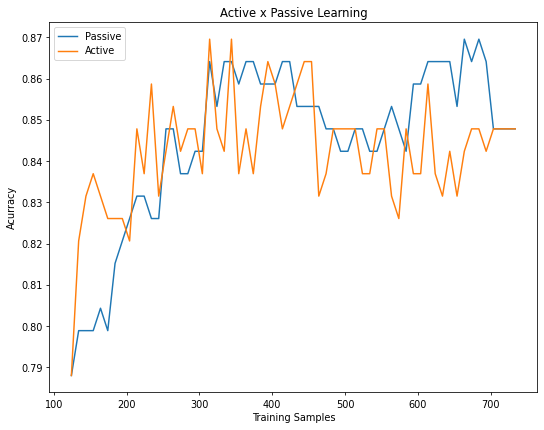

In [21]:
figure(figsize=(9, 7), dpi=70)

# plotting the points 
plt.plot(training_samples['Samples'], df_acc['Accuracy'], label='Passive')
plt.plot(training_samples2['Samples'], df_acc2['Accuracy'], label='Active')  
# naming the x axis
plt.xlabel('Training Samples')
# naming the y axis
plt.ylabel('Acurracy')
  
# giving a title to my graph
plt.title('Active x Passive Learning')

# Giving a legend to my graph
plt.legend()

# function to show the plot
plt.show()